<h1 align=center> Autonomous Research Assistant Agents </h1>


In [1]:
import arxiv
import os

from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langgraph.graph import MessagesState, StateGraph, START, END
from typing import Annotated, TypedDict, List, Optional
from typing_extensions import Literal
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.types import Command
from langgraph.prebuilt import create_react_agent
from langchain.tools import tool


from dotenv import load_dotenv

load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model_name="deepseek-r1-distill-llama-70b")

results = llm.invoke("tell me about multi agent types?")
results

AIMessage(content='<think>\nOkay, so I need to figure out what multi-agent types are. I remember hearing about agents in AI before, but I\'m not exactly sure what "types" mean in this context. Let me start by breaking down the term. "Multi-agent" probably means multiple agents working together or in some system. "Types" could refer to different categories or classifications of these agents. So, putting it together, multi-agent types might be the various kinds of agents that can exist within a multi-agent system.\n\nI think the user provided a detailed explanation before, so maybe I should go through that to make sure I understand. They listed several types like Reactive, Cognitive, Hybrid, Autonomous, etc. I should probably go through each of these to get a clearer picture.\n\nStarting with Reactive Agents: These are simple and react to the environment without complex reasoning. They use predefined rules, like in video games where an enemy follows a player based on certain conditions. 

In [3]:
# Initialize LLM (use gpt-4 or gpt-3.5-turbo)
llm2 = ChatOpenAI(model="gpt-4", temperature=0.2)
llm2.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4-0613', 'system_fingerprint': None, 'id': 'chatcmpl-Bm4UXNDBl28kKIgq2JFO0VAlTKkjF', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b2bcccbc-631f-48d3-9b61-9b5914ee4e62-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [4]:
def get_arxiv_papers(topic: str, max_results: int = 3) -> list:
    search = arxiv.Search(
        query=topic,
        max_results=max_results,
        sort_by=arxiv.SortCriterion.Relevance
    )

    papers = []
    for result in search.results():
        paper_info = {
            "title": result.title,
            "authors": [author.name for author in result.authors],
            "summary": result.summary,
            "url": result.entry_id,
            "published": result.published.date()
        }
        papers.append(paper_info)
    return papers

In [5]:
topic = "Large Language Models in Healthcare"
papers = get_arxiv_papers(topic)

for i, paper in enumerate(papers):
    print(f"📄 Paper {i+1}: {paper['title']}")
    print(f"👨‍🔬 Authors: {', '.join(paper['authors'])}")
    print(f"🗓️ Published: {paper['published']}")
    print(f"🔗 URL: {paper['url']}")
    print(f"📄 Abstract: {paper['summary'][:500]}...\n")

C:\Users\44787\AppData\Local\Temp\ipykernel_30328\3121392185.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


📄 Paper 1: Aligning Large Language Models with Healthcare Stakeholders: A Pathway to Trustworthy AI Integration
👨‍🔬 Authors: Kexin Ding, Mu Zhou, Akshay Chaudhari, Shaoting Zhang, Dimitris N. Metaxas
🗓️ Published: 2025-05-02
🔗 URL: http://arxiv.org/abs/2505.02848v1
📄 Abstract: The wide exploration of large language models (LLMs) raises the awareness of
alignment between healthcare stakeholder preferences and model outputs. This
alignment becomes a crucial foundation to empower the healthcare workflow
effectively, safely, and responsibly. Yet the varying behaviors of LLMs may not
always match with healthcare stakeholders' knowledge, demands, and values. To
enable a human-AI alignment, healthcare stakeholders will need to perform
essential roles in guiding and enhancing...

📄 Paper 2: An Analysis on Large Language Models in Healthcare: A Case Study of BioBERT
👨‍🔬 Authors: Shyni Sharaf, V. S. Anoop
🗓️ Published: 2023-10-11
🔗 URL: http://arxiv.org/abs/2310.07282v2
📄 Abstract: This paper co

In [6]:
# LangChain prompt template
summary_prompt = PromptTemplate.from_template("""
You are an AI research assistant. Read the abstract below and summarize the key points.

Abstract:
"{abstract}"

Summarize in 3 bullet points.
""")


summarizer_chain = summary_prompt | llm

In [7]:
summarized_papers = []

for paper in papers:
    abstract = paper["summary"]
    summary = summarizer_chain.invoke({"abstract": abstract})

    paper_with_summary = {
        **paper,
        "summary_bullets": summary
    }
    summarized_papers.append(paper_with_summary)

In [8]:
for i, paper in enumerate(summarized_papers):
    print(f"📘 Paper {i+1}: {paper['title']}")
    print(f"📝 Summary:\n{paper['summary_bullets']}")
    print(f"🔗 URL: {paper['url']}\n{'='*80}\n")

📘 Paper 1: Aligning Large Language Models with Healthcare Stakeholders: A Pathway to Trustworthy AI Integration
📝 Summary:
content="<think>\nAlright, I've got this abstract to summarize into three bullet points. Let me read through it again to make sure I get the main ideas.\n\nThe abstract talks about large language models (LLMs) being widely explored in healthcare. It mentions that aligning these models with what healthcare stakeholders want and value is really important for effective, safe, and responsible use. But the problem is that LLMs don't always behave in ways that match what healthcare professionals know, need, or value. So, to fix this, stakeholders need to be involved in the whole process of using LLMs in healthcare—like when they're being trained, when data is being picked, and when they're actually used. The review discusses methods, tools, and applications to make sure LLMs align better with these stakeholders. They show that by integrating healthcare knowledge, underst

`Define Shared State`

- LangGraph uses a shared dictionary-like state that agents can read/write.


In [9]:
class ResearchState(TypedDict):
    topic: str
    papers: Optional[List[dict]]
    summaries: Optional[List[dict]]

In [10]:
def get_next_node(last_message: BaseMessage, goto: str):
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    return goto

In [11]:
def make_system_prompt(instruction: str) -> str:
    return (
        "You are a helpful AI assistant, collaborating with other assistants."
        " Use the provided tools to progress towards answering the question."
        " If you are unable to fully answer, that's OK, another assistant with different tools "
        " will help where you left off. Execute what you can to make progress."
        " If you or any of the other assistants have the final answer or deliverable,"
        " prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{instruction}"
    )

In [12]:
@tool
def arxiv1(topic: str, max_results: int = 2) -> str:
    """Fetches relevant paper abstracts from arXiv based on a topic."""
    papers = get_arxiv_papers(topic, max_results)
    output = ""
    for i, paper in enumerate(papers):
        output += f"\n[{i+1}] {paper['title']} ({paper['published']})\n"
        output += f"Authors: {', '.join(paper['authors'])}\n"
        output += f"Abstract: {paper['summary'][:500]}...\n"
        output += f"URL: {paper['url']}\n\n"
    return output

In [13]:
research_agent = create_react_agent(
    llm,
    tools=[arxiv1],
    prompt=make_system_prompt(
        "You can only do research. You are working with a summarizer colleague."
    ),
)

In [14]:
@tool
def summarize_abstract(abstract: str) -> str:
    """
    Summarizes a research paper abstract into 3 concise bullet points.
    """

    summary_prompt = PromptTemplate.from_template("""
    You are an AI research assistant. Read the abstract below and summarize the key points.

    Abstract:
    "{abstract}"

    Summarize in 3 bullet points.
    """)

    response = summary_prompt | llm
    return response

In [15]:
summarized_agent = create_react_agent(
    llm,
    tools=[summarize_abstract],
    prompt=make_system_prompt(
        "You can only summarize abstracts. Your teammate provides the abstracts."
    )
)

In [16]:
def research_node(state: MessagesState) -> Command[Literal["summarizer", END]]:

    result = research_agent.invoke(state)

    goto = get_next_node(result["messages"][-1], "summarizer")

    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="researcher")

    return Command(update={"messages": result["messages"]}, goto=goto)

In [17]:
def summarizer_node(state: MessagesState) -> Command[Literal["researcher", END]]:

    result = summarized_agent.invoke(state)

    goto = get_next_node(result["messages"][-1], "researcher")

    result["messages"][-1] = HumanMessage(
        content=result["messages"][-1].content, name="summarizer")

    return Command(update={"messages": result["messages"]}, goto=goto)

In [18]:
workflow = StateGraph(MessagesState)

workflow.add_node("researcher", research_node)
workflow.add_node("summarizer", summarizer_node)

workflow.add_edge(START, "researcher")
app = workflow.compile()

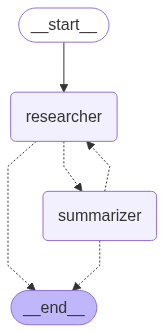

In [19]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [22]:
app.invoke({"messages": [("user", "get the research paper in transformer")], })

C:\Users\44787\AppData\Local\Temp\ipykernel_30328\3121392185.py:9: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  for result in search.results():


InternalServerError: no healthy upstream